# Market Basket Analysis Purpose:
To increase sell by 
1. Finding the best ways to create promotions or apply discounts on particular items
2. Finding the pattern occuring to sales to apply promotions more accurately

# What is Market Basket Analysis?
1. It is an accidental transaction pattern that purchasing some products will affect the purchasing of other products
2. It is used to predict what products that customer interested in
3. It helps sellers or reatilers to find a patterns that shows which items are frequently purchased together so that   he/she could apply a discounts into a particular items more accurately.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Read csv file, file is encoded in 'latin'
df = pd.read_csv('Analytics case study (market basket analysis, ecommerce).csv', encoding='latin')
# show first 5 rows
df.head()

,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
0,3.7V 3400mah LIION 12.6WH,Battery/Consumer Rechargeable,EC0043605902,47,"$1,597.53"
1,3V PHOTO LITHIUM,Battery/Primary Other,EC0043507670,47,"$1,246.44"
2,12V 11.2AH 225CCA AGM 12/0,Battery/Powersports,EC0043504182,41,"$4,714.59"
3,12V 12AH 165CCA FLOODED 6/0,Battery/Powersports,EC0043503186,39,"$2,456.61"
4,12V 12AH 210CCA AGM 12/0,Battery/Powersports,EC0043406547,34,"$3,570.00"


In [3]:
# show random 10 rows
df.sample(10)

,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
79801,AGM 12V 7AH .187 FASTON,Battery/Sealed Lead Acid,EC0043608768,1,$43.99
9417,AGM 12V 35AH (U1) CU INS,Battery/Sealed Lead Acid,EC0044000596,2,$207.98
73768,8V GC8 ULTRA 12,Battery/Golf &amp; Scrubber,EC0043704149,1,"$1,019.94"
83634,AGM 6V 5AH .187 FASTON,Battery/Sealed Lead Acid,EC0043309520,1,$25.99
57892,2 CHANNEL LITH-ION 18650 CHARGER,Charger/Consumer Rechargeable,EC0043403286,1,$21.99
29007,12V 24F ULTRA GOLD 36,Battery/Auto/Light Truck,EC0043201764,1,$149.99
88437,FREEDOM V2 Z1/Z2 TRAVEL CABLE,Accessory/Med,EC0043203942,1,$47.99
75763,AGM 12V 12AH .250 FASTON,Battery/Sealed Lead Acid,EC0042807791,1,$49.99
24929,12V 18AH 310CCA AGM 12/0,Battery/Powersports,EC0043904490,1,$116.99
3432,12V 12AH LEAD OE POWERWHEEL BATTERY,Battery/Sealed Lead Acid,EC0043304062,2,$145.98


In [4]:
# short intro of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [5]:
# drop all null values
df = df.dropna()

In [6]:
# statistical analysis of data
df.describe()

,Unique Purchases
count,92250.000000
mean,1.164564
std,0.676474
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


In [7]:
# using the positive quantity values
df = df[df['Unique Purchases']>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
# drop row where Transaction Id is missing
df.drop(df[df['Transaction ID'] == '<transaction id>'].index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92249 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92249 non-null  object
 1   Product Category (Enhanced Ecommerce)  92249 non-null  object
 2   Transaction ID                         92249 non-null  object
 3   Unique Purchases                       92249 non-null  int64 
 4   Product Revenue                        92249 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


# Top 15 Products

In [10]:
x = df['Product'].value_counts().sort_values(ascending=False)[:15]
x

12V U1 L&amp;G 6                  2425
6V GC2 ULTRA GOLF 12              1684
AGM 12V 7AH .187 FASTON           1642
12V 18AH 310CCA AGM 12/0          1204
12V 31DT DURACELL ULTRA AGM 30    1118
AGM 12V 5AH .187 FASTON           1077
DC 12V 35AH J TERM                1005
12V 17.5AH 310 CCA                 996
1.5V IND AA ALK BULK               979
1.5V ALKAL                         977
12V 30AH 400 CCA                   940
12V U1R L&amp;G 6                  928
1.55V SVROX                        925
12V 27 MARINE DP 12                922
12V 24 MARINE DP 12                900
Name: Product, dtype: int64

C:\Users\saman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

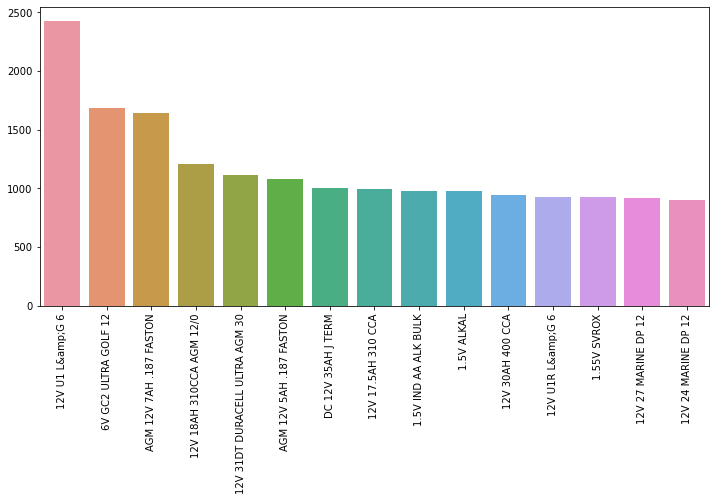

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5.5))
plt.xticks(rotation = 90)
sns.barplot(x.index,x.values)

# Creating the basket
1. data is grouped by the transaction ('Transaction ID') & the items ('Product') and the values of Quantity of each item bought is shown. 
2. After, the value is sum up  and unstacked. 
3. Lastly, the index of the data frame is changed to the Transaction ID so that we could see the quantity of each item bought per InvoiceNo. 
4. This dataframe is basically the ‘basket’ that customers ‘carry on’ to the cashier in shop. 
5. It shows us how much this customer / transaction (Transaction ID) bought a particular item. If the number is 0, then this customer didn’t buy that particular item. If it shows another value (12 for instances), it means that the customer has bought as many as 12 items.

In [12]:
basket_plus = (df.groupby(['Transaction ID', 'Product'])['Unique Purchases']
               .sum().unstack().reset_index().fillna(0).set_index('Transaction ID'))
basket_plus

Product,(4)F32T8 CENTIUM IS UNV,(not set),1 BANK 10A ONBOARD BATTERY CHARGER,1 BANK 5A ONBOARD BATTERY CHARGER,1.2V 1100MAH NICAD,1.2V 12000MAH NIMH,1.2V 1200MAH NICAD,1.2V 1200MAH NICAD 4/5A,1.2V 1200MAH NIMH,1.2V 1400MAH NICAD 4/5A,...,Y50-N18L-A W/METAL JACKET,YB16L-B W/METAL JACKET,YETI 1500X PORTABLE POWER STATION,YETI 200X PORTABLE POWER,YETI 3000X PORTABLE POWER STATION,YETI 400 PROTECTION CASE,YETI 500X PORTABLE POWER STATION,ZBUG LANTERN + LIGHT,ZUS SMART VEHICLE HEALTH MONITOR MINI,ZUS UNIVERSAL CAR AUDIO ADAPTER
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12345678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0032704676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0042407100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0044007292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0044007293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#drop 'not set' column because it represents Product are missing
basket_plus.drop('(not set)', axis=1, inplace=True)

In [14]:
basket_plus

Product,(4)F32T8 CENTIUM IS UNV,1 BANK 10A ONBOARD BATTERY CHARGER,1 BANK 5A ONBOARD BATTERY CHARGER,1.2V 1100MAH NICAD,1.2V 12000MAH NIMH,1.2V 1200MAH NICAD,1.2V 1200MAH NICAD 4/5A,1.2V 1200MAH NIMH,1.2V 1400MAH NICAD 4/5A,1.2V 1500MAH NIMH,...,Y50-N18L-A W/METAL JACKET,YB16L-B W/METAL JACKET,YETI 1500X PORTABLE POWER STATION,YETI 200X PORTABLE POWER,YETI 3000X PORTABLE POWER STATION,YETI 400 PROTECTION CASE,YETI 500X PORTABLE POWER STATION,ZBUG LANTERN + LIGHT,ZUS SMART VEHICLE HEALTH MONITOR MINI,ZUS UNIVERSAL CAR AUDIO ADAPTER
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12345678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0032704676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0042407100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0044007292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0044007293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Encoding the Data:
1. In market basket analysis, the number of each item bought is not really important. The important is whether an item is bought or not
2. The reason is know, what is the association of buying some items and buying some others
3. The basket data is encoded into a binary data that shows whether an items is bought (1) or not (0)
4. encode_units function - encode the units i.e. If the units is equal to or less than 0, the function will change it into 0 (Not bought). If the units is more than or equal to 1, it will change the units into 1 (bought)

In [15]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus

Product,(4)F32T8 CENTIUM IS UNV,1 BANK 10A ONBOARD BATTERY CHARGER,1 BANK 5A ONBOARD BATTERY CHARGER,1.2V 1100MAH NICAD,1.2V 12000MAH NIMH,1.2V 1200MAH NICAD,1.2V 1200MAH NICAD 4/5A,1.2V 1200MAH NIMH,1.2V 1400MAH NICAD 4/5A,1.2V 1500MAH NIMH,...,Y50-N18L-A W/METAL JACKET,YB16L-B W/METAL JACKET,YETI 1500X PORTABLE POWER STATION,YETI 200X PORTABLE POWER,YETI 3000X PORTABLE POWER STATION,YETI 400 PROTECTION CASE,YETI 500X PORTABLE POWER STATION,ZBUG LANTERN + LIGHT,ZUS SMART VEHICLE HEALTH MONITOR MINI,ZUS UNIVERSAL CAR AUDIO ADAPTER
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12345678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042407100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Filter The Transaction : Bought More Than 1 Items Only
1. In market basket analysis, purpose is to uncover the association between 2 or more items that is bought according to historical data. 
2. So, it is less useful if a transaction only bought a single items

In [16]:
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >= 2]
basket_filter_plus

Product,(4)F32T8 CENTIUM IS UNV,1 BANK 10A ONBOARD BATTERY CHARGER,1 BANK 5A ONBOARD BATTERY CHARGER,1.2V 1100MAH NICAD,1.2V 12000MAH NIMH,1.2V 1200MAH NICAD,1.2V 1200MAH NICAD 4/5A,1.2V 1200MAH NIMH,1.2V 1400MAH NICAD 4/5A,1.2V 1500MAH NIMH,...,Y50-N18L-A W/METAL JACKET,YB16L-B W/METAL JACKET,YETI 1500X PORTABLE POWER STATION,YETI 200X PORTABLE POWER,YETI 3000X PORTABLE POWER STATION,YETI 400 PROTECTION CASE,YETI 500X PORTABLE POWER STATION,ZBUG LANTERN + LIGHT,ZUS SMART VEHICLE HEALTH MONITOR MINI,ZUS UNIVERSAL CAR AUDIO ADAPTER
Transaction ID,,,,,,,,,,,,,,,,,,,,,
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042801384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042802882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042803407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042803469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. According to the result above, there are 6321 transaction that bought more than 1 items. 
2. It means, (6321 % 83013) * 100 = 7.61 % of the basket data is a transaction that is bought more than 1 item.

# Association Rules:

1. Assume there are 100 customers
2. 10 of them bought milk, 8 bought butter and 6 bought both of them.
3. suppose, we are trying to find a pattern : bought milk => bought butter
4. support = P(Milk & Butter) = 6/100 = 0.06, means 0.06 * 100 = 6% transactions that customer bought milk and butter together
5. confidence = support/P(Butter) = 0.06/0.08 = 0.75, means 0.75 * 100 = 75% that customer who bought milk, also bought butter
6. lift = confidence/P(Milk) = 0.75/0.10 = 7.5, indicates the strength of the rule or pattern, lift > 1 means rule does not occur by random pattern

# Apriori Algorithm
1. It is useful in mining frequent itemsets and relevant association rules. Terminology:
2. k-itemset: a set of k items.
   e.g. {beer, diapers, juice} is a 3-itemset; {cheese} is a 1-itemset; {honey, ice-cream} is a 2-itemset 
2. Support
4. Minimum support: The Apriori algorithm starts a specified minimum level of support, and focuses on itemsets with at least this level.
5. It initially scans and determines the frequency of individual items (i.e. the item set size, k = 1). 
6. For example, if itemset {A, B} is not frequent, then we can exclude all item set combinations that include {A, B}

# A full run through of Apriori
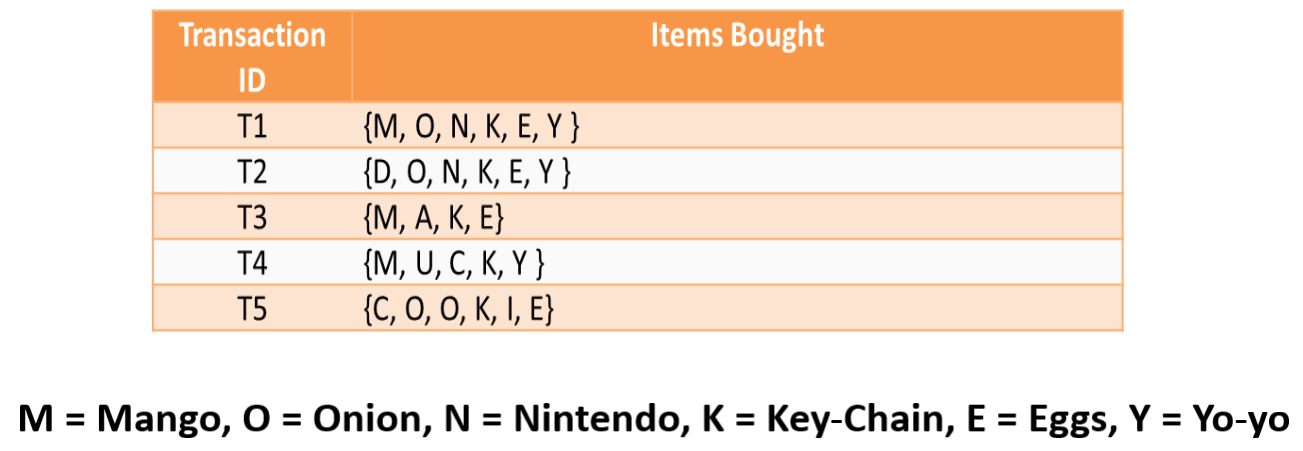

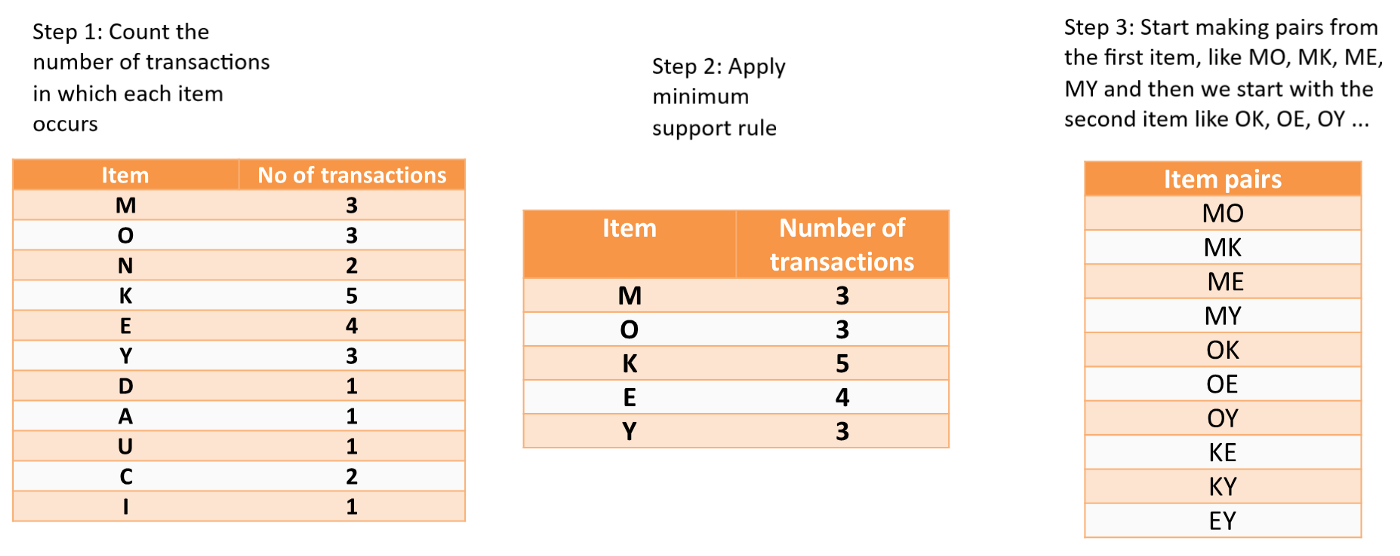

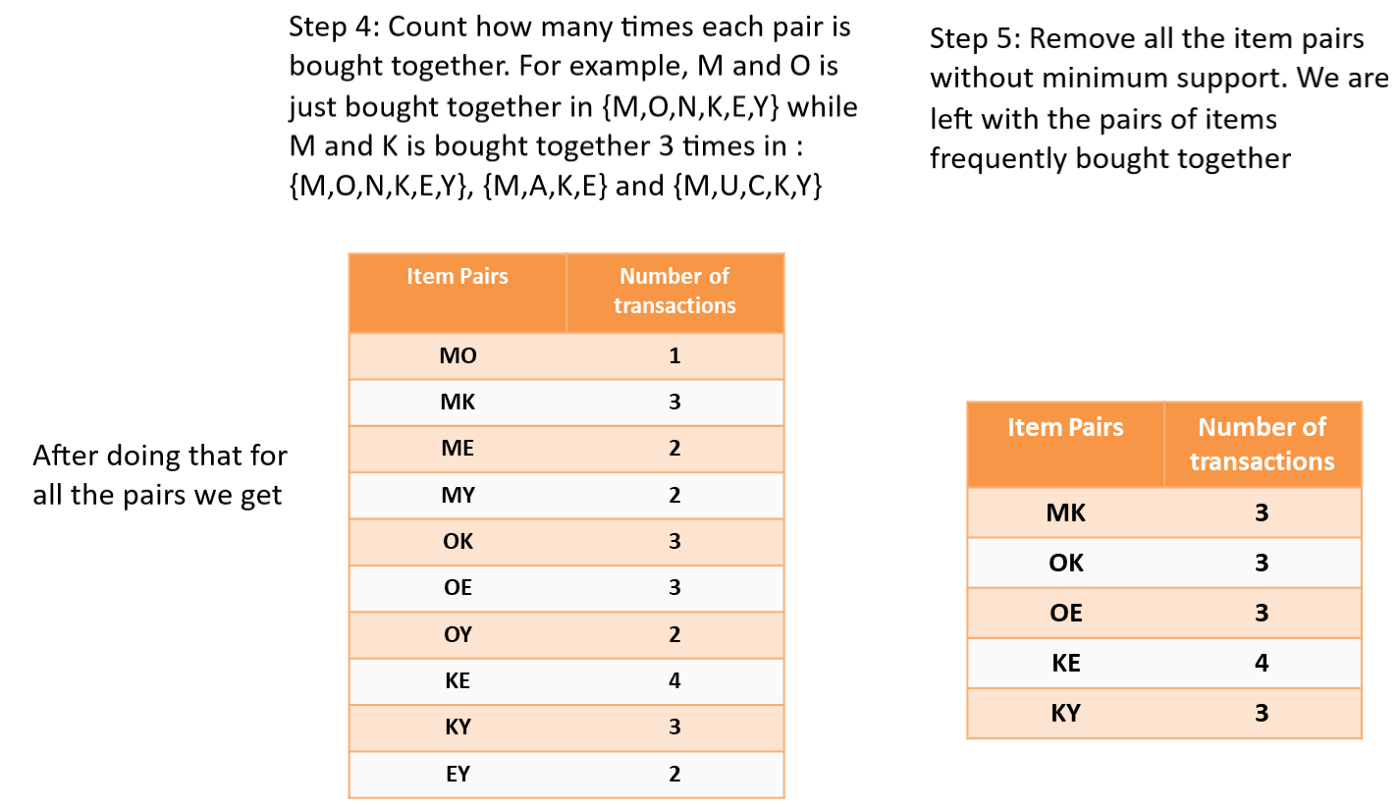

# Step - 6:
1. To make the set of three items we need one more rule (it’s termed a self-join). 
2. From the Item pairs in the above table, we find two pairs with the same first Alphabet, so we get OK and OE, this gives OKE, KE and KY, this gives KEY
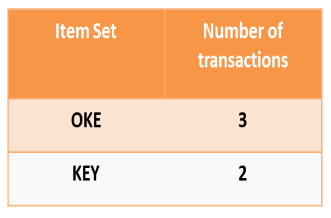

# Applying the Apriori Algorithm

In [17]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

C:\Users\saman\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.115013,(1.5V IND AA ALK BULK),1
1,0.111691,(1.5V IND AAA ALK BULK),1
2,0.098719,(1.5V ALKAL),1
3,0.086062,"(1.5V IND AA ALK BULK, 1.5V IND AAA ALK BULK)",2
4,0.079418,(1.5V ALKALINE AA CONTRACTOR 24PK),1
5,0.056320,(D ALKALINE BULK),1
6,0.051732,"(1.5V ALKALINE AA CONTRACTOR 24PK, 1.5V ALKAL)",2
7,0.042240,(9V IND ALK BULK),1
8,0.037810,(24PK 1.5V AA ALKALINE),1
9,0.036228,(C ALKALINE BULK),1


# Frequently Bought Items
1. In apriori algorithm, we are able to define the frequent data defined by the given support value
2. A frequently bought items are defined as an items that is bought as many as 3% out of the whole transaction i.e. support value 0.03
3. Column length that contain the number of item that is bought
4. There are 13 transaction that is consider as a frequently bought items
5. 1.5V IND AA ALK BULK is the most frequently bought items with the support value of 0.115013, it means the item is bought = 6321 * .115013 = 727 times out of the whole transaction. 

In [18]:
# Frequently bought 1 item
frequent_itemsets_plus[ (frequent_itemsets_plus['length'] == 1)]

,support,itemsets,length
0,0.115013,(1.5V IND AA ALK BULK),1
1,0.111691,(1.5V IND AAA ALK BULK),1
2,0.098719,(1.5V ALKAL),1
4,0.079418,(1.5V ALKALINE AA CONTRACTOR 24PK),1
5,0.056320,(D ALKALINE BULK),1
7,0.042240,(9V IND ALK BULK),1
8,0.037810,(24PK 1.5V AA ALKALINE),1
9,0.036228,(C ALKALINE BULK),1
11,0.030059,(1.5V ALKALINE D CONTRACTOR 12PK),1


In [19]:
# Frequently bought 2 items together
frequent_itemsets_plus[ (frequent_itemsets_plus['length'] == 2)]

,support,itemsets,length
3,0.086062,"(1.5V IND AA ALK BULK, 1.5V IND AAA ALK BULK)",2
6,0.051732,"(1.5V ALKALINE AA CONTRACTOR 24PK, 1.5V ALKAL)",2
10,0.031641,"(1.5V IND AA ALK BULK, D ALKALINE BULK)",2
12,0.030059,"(D ALKALINE BULK, 1.5V IND AAA ALK BULK)",2


#  Finding The Association Between Frequently Bought Items
From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together.

In [20]:
rules = association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

In [21]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1.5V IND AA ALK BULK),(1.5V IND AAA ALK BULK),0.115013,0.111691,0.086062,0.748281,6.699549,0.073216,3.528965
1,(1.5V IND AAA ALK BULK),(1.5V IND AA ALK BULK),0.111691,0.115013,0.086062,0.770538,6.699549,0.073216,3.856793
2,(1.5V ALKAL),(1.5V ALKALINE AA CONTRACTOR 24PK),0.098719,0.079418,0.051732,0.524038,6.598500,0.043892,1.934152
3,(1.5V ALKALINE AA CONTRACTOR 24PK),(1.5V ALKAL),0.079418,0.098719,0.051732,0.651394,6.598500,0.043892,2.585390
4,(1.5V IND AA ALK BULK),(D ALKALINE BULK),0.115013,0.056320,0.031641,0.275103,4.884627,0.025163,1.301813
5,(D ALKALINE BULK),(1.5V IND AA ALK BULK),0.056320,0.115013,0.031641,0.561798,4.884627,0.025163,2.019585
6,(D ALKALINE BULK),(1.5V IND AAA ALK BULK),0.056320,0.111691,0.030059,0.533708,4.778424,0.023768,1.905048
7,(1.5V IND AAA ALK BULK),(D ALKALINE BULK),0.111691,0.056320,0.030059,0.269122,4.778424,0.023768,1.291159


# Association Rules Interpretation
1. From the association_rules results above, 1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK are the items that has the highest association each other since these two items has the highest “lift” value. 
2. The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other. 
3. In thise case, the highest value is 6.699549 which is very high. It means these 2 items are very good to be sold together.
4. The support value of 1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK are 0.086062 which means there are 8.60% out of total transaction that these 2 items were sold together. In number, it is 6321 * 0.086062 = 544 times.
5. The confidence value is influenced by the antecedent and consequent. 
6. If the antecedent is higher than the consequent, then the rule that will be applied is rule number 1 (not number 2). vice versa. 
7. In this case, the antecedent value is higher than the consequent value. It means we will apply rule number 1 which is 1.5V IND AA ALK BULK and 1.5V IND AAA ALK BULK. 
8. It means that a customer will tends to bought 1.5V IND AAA ALK BULK, AFTER they bought 1.5V IND AA ALK BULK.
9. This could be a very valuable information, We could give a discounts on 1.5V IND AAA ALK BULK if a customer buy 1.5V IND AA ALK BULK.

# Data-driven marketing strategy and decision making

# 1. Item Placements:
We could put 1.5V IND AAA ALK BULK and 1.5V IND AA ALK BULK in a closer place, maybe in a same shelf or any other closer place.

# 2. Products Bundling:
We could put 1.5V IND AAA ALK BULK and 1.5V IND AA ALK BULK as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.

# 3. Customer Recommendation and Discounts:
We could put 1.5V IND AAA ALK BULK in the cashier, so that every time a customer bought 1.5V IND AA ALK BULK, we could offer and recommend them to buy 1.5V IND AAA ALK BULK with a lower price.

# Most Strength Association Rules

In [22]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1.5V IND AA ALK BULK),(1.5V IND AAA ALK BULK),0.115013,0.111691,0.086062,0.748281,6.699549,0.073216,3.528965
1,(1.5V IND AAA ALK BULK),(1.5V IND AA ALK BULK),0.111691,0.115013,0.086062,0.770538,6.699549,0.073216,3.856793
2,(1.5V ALKAL),(1.5V ALKALINE AA CONTRACTOR 24PK),0.098719,0.079418,0.051732,0.524038,6.598500,0.043892,1.934152
3,(1.5V ALKALINE AA CONTRACTOR 24PK),(1.5V ALKAL),0.079418,0.098719,0.051732,0.651394,6.598500,0.043892,2.585390


# Another Demonstration to increase sell of one item through another item

In [23]:
basket_plus['1.5V IND AAA ALK BULK'].sum()

806.0

In [24]:
basket_plus['1.5V IND AA ALK BULK'].sum()

1022.0

We sell 1022 quantity of 1.5V IND AA ALK BULK but only 806 quantity of 1.5V IND AAA ALK BULK so maybe we can drive more 1.5V IND AAA ALK BULK sales through recommendations.

In [25]:
basket_plus['1.5V ALKAL'].sum()

1163.0

In [26]:
basket_plus['1.5V ALKALINE AA CONTRACTOR 24PK'].sum()

715.0

We sell 1163 quantity of 1.5V ALKAL but only 715 quantity of 1.5V ALKALINE AA CONTRACTOR 24PK so maybe we can drive more 1.5V ALKALINE AA CONTRACTOR 24PK sales through recommendations.